# <br>Problem 3: Decision Trees on Kaggle (50 points)

In [2]:
from __future__ import division
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
np.random.seed(20)
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)

In [3]:
class BaggedNN(ml.base.classifier):
    def __init__(self, learners):
        """Constructs a BaggedTree class with a set of learners. """
        self.learners = learners
    
    def predictSoft(self, X):
        """Predicts the probabilities with each bagged learner and average over the results. """
        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis=0)
    
def get_2d_array_of_size(x, y):
    result = []
    for i in range(x):
        result.append([])
        for j in range(y):
            result[i].append(-1)
            
    return result

In [14]:
num_of_shuffles = 5
depth_recur = 8
training_data_amount = 80000
stopIterAmount = 65

firstLayerNodeCount2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
training_error_rates2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
validation_error_rates2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
training_aucs2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
validation_aucs2 = get_2d_array_of_size(num_of_shuffles, depth_recur)
learners2 = get_2d_array_of_size(num_of_shuffles, depth_recur)

for shuffle_num in range(num_of_shuffles):
    print shuffle_num
    X,Y = ml.shuffleData(X,Y)
    Xtr = X[:training_data_amount]
    Ytr = Y[:training_data_amount]
    Xva = X[training_data_amount:]
    Yva = Y[training_data_amount:]
    for i in range(2,2+depth_recur):
        firstLayerNodeCount2[shuffle_num][i-2] = 2**i
        nn = ml.nnet.nnetClassify()
        nn.init_weights([Xtr.shape[1], 2**i, len(np.unique(Ytr))], 'random', Xtr, Ytr)
        nn.train(Xtr, Ytr, stopTol=1e-4, stepsize=1.1, stopIter=stopIterAmount)
        learners2[shuffle_num][i-2] = nn
        training_error_rates2[shuffle_num][i-2] = nn.err(Xtr, Ytr)
        validation_error_rates2[shuffle_num][i-2] = nn.err(Xva, Yva)
        training_aucs2[shuffle_num][i-2] = nn.auc(Xtr, Ytr)
        validation_aucs2[shuffle_num][i-2] = nn.auc(Xva, Yva)
        print "For", str(2**i) + ":"
        print "\t training error  :", nn.err(Xtr, Ytr)
        print "\t training auc    :", nn.auc(Xtr, Ytr)
        print "\t validation error:", nn.err(Xva, Yva)
        print "\t validation auc  :", nn.auc(Xva, Yva)
        

        

0
it 1 : Jsur = 0.496833893917, J01 = 0.34075
it 2 : Jsur = 0.478897559582, J01 = 0.3545625
it 4 : Jsur = 0.438366271845, J01 = 0.3406375
it 8 : Jsur = 0.435563168102, J01 = 0.34075
it 16 : Jsur = 0.433148499269, J01 = 0.3420625
For 4:
	 training error  : 0.34075
	 training auc    : 0.597553413024928
	 validation error: 0.3431
	 validation auc  : 0.6000360043657359
it 1 : Jsur = 0.561457524048, J01 = 0.3529375
it 2 : Jsur = 0.493493666938, J01 = 0.345475
it 4 : Jsur = 0.466743615415, J01 = 0.34075
it 8 : Jsur = 0.438759816141, J01 = 0.34075
it 16 : Jsur = 0.433212803454, J01 = 0.3403375
it 32 : Jsur = 0.430825305813, J01 = 0.3299
For 8:
	 training error  : 0.331575
	 training auc    : 0.6141512311673901
	 validation error: 0.33275
	 validation auc  : 0.6176841500349695
it 1 : Jsur = 0.584967012686, J01 = 0.3414125
it 2 : Jsur = 0.524182543439, J01 = 0.3446375
it 4 : Jsur = 0.478021485781, J01 = 0.34075
it 8 : Jsur = 0.457369177989, J01 = 0.34075
it 16 : Jsur = 0.434628001594, J01 = 0.3

	 validation auc  : 0.5538323558139667
it 1 : Jsur = 0.681131314577, J01 = 0.3413375
it 2 : Jsur = 0.681742294486, J01 = 0.341125
it 4 : Jsur = 0.669588780935, J01 = 0.340975
it 8 : Jsur = 0.608365890688, J01 = 0.34105
it 16 : Jsur = 0.508579594824, J01 = 0.341175
it 32 : Jsur = 0.460896548851, J01 = 0.3417375
For 128:
	 training error  : 0.3410875
	 training auc    : 0.5776656687910975
	 validation error: 0.3418
	 validation auc  : 0.574430101733391
it 1 : Jsur = 0.682106090912, J01 = 0.341125
it 2 : Jsur = 0.680382047166, J01 = 0.34115
it 4 : Jsur = 0.672832513914, J01 = 0.341675
it 8 : Jsur = 0.659449694857, J01 = 0.340925
it 16 : Jsur = 0.632281610968, J01 = 0.3407375
it 32 : Jsur = 0.493637321301, J01 = 0.3412375
it 64 : Jsur = 0.438974297767, J01 = 0.3360625
For 256:
	 training error  : 0.3338
	 training auc    : 0.6038029963240444
	 validation error: 0.33495
	 validation auc  : 0.5977906874429103
it 1 : Jsur = 0.686683179114, J01 = 0.341125
it 2 : Jsur = 0.750981062116, J01 = 0.

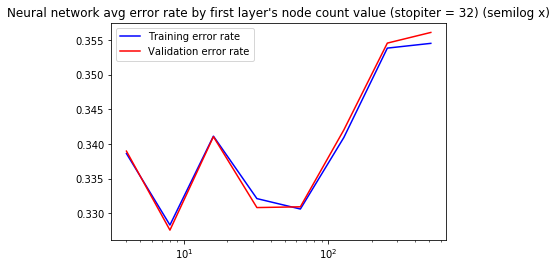

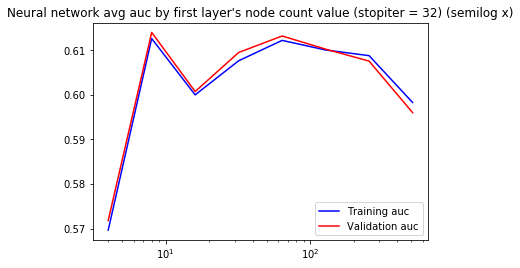

In [15]:
#Plot the training error rates and validation error rates as a function of the firstLayerNodeCount

def avg(arrays):
    avgs = []
    for cur_x in range(len(arrays[0])):
        acr = []
        for i in range(len(arrays)):
            acr.append(arrays[i][cur_x])
        avgs.append(sum(acr)/len(acr)) #take mean of acr and append
    return avgs

plt.figure(0)
plt.semilogx(avg(firstLayerNodeCount2), avg(training_error_rates2),'b-', label="Training error rate")
plt.semilogx(avg(firstLayerNodeCount2), avg(validation_error_rates2),'r-', label="Validation error rate")
plt.title("Neural network avg error rate by first layer's node count value (stopiter = 32) (semilog x)")
plt.legend()
plt.show()

#Plot the training auc's and validation auc's as a function of the firstLayerNodeCount
plt.figure(0)
plt.semilogx(avg(firstLayerNodeCount2), avg(training_aucs2),'b-', label="Training auc")
plt.semilogx(avg(firstLayerNodeCount2), avg(validation_aucs2),'r-', label="Validation auc")
plt.title("Neural network avg auc by first layer's node count value (stopiter = 32) (semilog x)")
plt.legend()
plt.show()

In [27]:
class BaggedNN(ml.base.classifier):
    def __init__(self, learners):
        """Constructs a BaggedTree class with a set of learners. """
        self.learners = learners
    
    def predictSoft(self, X):
        """Predicts the probabilities with each bagged learner and average over the results. """
        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis=0)

print firstLayerNodeCount2[0]
print len(learners2)
    
bag = []
for ar1 in learners2:
    #for learner in ar1:
    bag.append(ar1[1])
    bag.append(ar1[5])
    bag.append(ar1[6])
    bag.append(ar1[7])
print len(bag)

bnn = BaggedNN(np.asarray(bag))
bnn.classes = np.unique(Y)

print("{0:>15}: {1:.4f}".format('Train AUC', bnn.auc(Xtr, Ytr)))
print("{0:>15}: {1:.4f}".format('Validation AUC', bnn.auc(X, Y)))


[4, 8, 16, 32, 64, 128, 256, 512]
5
20
      Train AUC: 0.6337
 Validation AUC: 0.6344


In [29]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), bnn.predictSoft(Xte)[:,1])).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')